<a href="https://colab.research.google.com/github/ramda1/proejct/blob/main/cp1_AI_10_%EB%82%A8%EB%8B%A4%EC%86%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
api_key = 'QWWTvgJtM0qrYWs1LqVV-z1gVxMckVAc'
api_secret = 'ss1BZiiYk3XSnc7zho-NSxqUbW6I9Sbq'

In [2]:
import requests
import base64
from collections import defaultdict
from pathlib import Path
import pickle
import time
 
endpoint = 'https://api-us.faceplusplus.com'
 
face_dict1 = defaultdict(str)


In [3]:
src1 = sorted(Path('/content/drive/MyDrive/새 폴더 (2)').glob('*.jpg'))

In [4]:

for i, file in enumerate(src1):
    img_file = base64.encodestring(open(file, 'rb').read())
    response = requests.post(
        endpoint + '/facepp/v3/detect',
        {
            'Content-Type': 'multipart/form-data',
            'api_key': api_key,
            'api_secret': api_secret,
            'image_base64': img_file,
            'return_attributes': 'gender,age,headpose,facequality,eyestatus,emotion,ethnicity,beauty,mouthstatus'
        }
    )
    time.sleep(1.9)
    try:
        result = response.json()
        face_dict1[file.name[:-4]] = result
        print(i,file.name[:-4],'OK')
    except:
        print(i,file)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: encodestring() is a deprecated alias since 3.1, use encodebytes()
  This is separate from the ipykernel package so we can avoid doing imports until


0 김도연 OK
1 김연아 OK
2 로제 OK
3 리사 OK
4 보나 OK
5 서현 OK
6 설아 OK
7 손예진 (2) OK
8 송지효 OK
9 송혜교 OK
10 수지 OK
11 아이유 OK
12 아이즈원1 OK
13 아이즈원10 OK
14 아이즈원11 OK
15 아이즈원2 OK
16 아이즈원3 OK
17 아이즈원4 OK
18 아이즈원5 OK
19 아이즈원6 OK
20 아이즈원7 OK
21 아이즈원8 OK
22 아이즈원9 OK
23 윤 OK
24 윤아 OK
25 이성경 OK
26 이하늬 OK
27 전지현 OK
28 지수2 OK
29 쯔위 OK
30 최유정 OK
31 크리스탈 OK
32 태연 OK
33 한예슬 OK


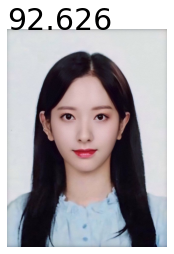

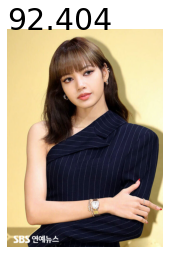

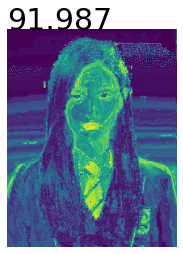

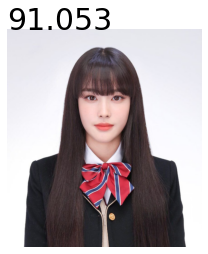

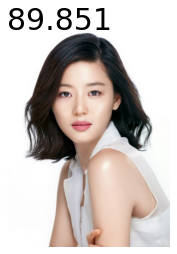

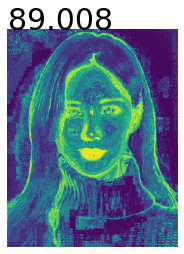

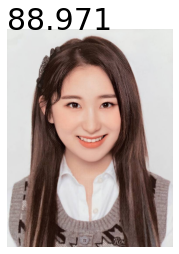

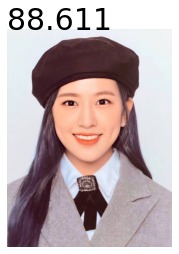

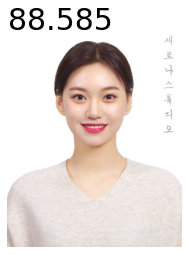

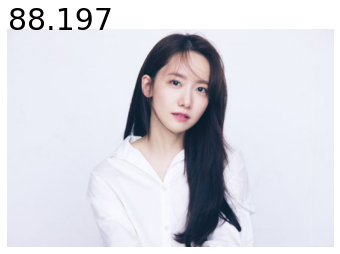

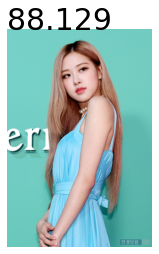

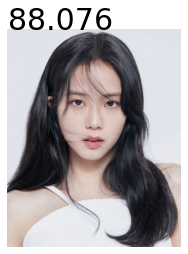

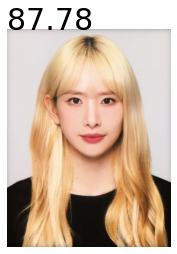

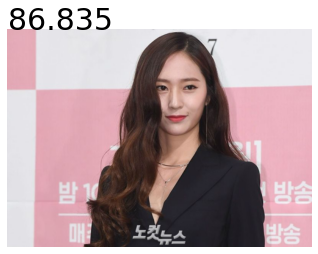

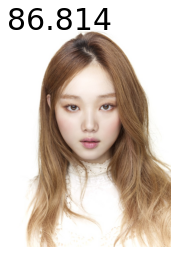

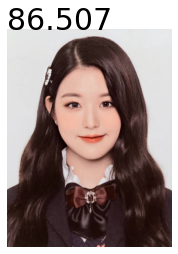

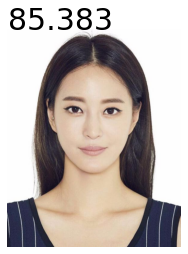

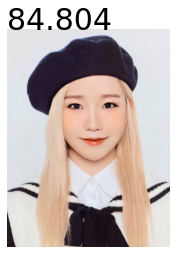

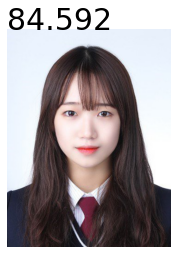

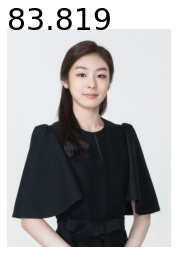

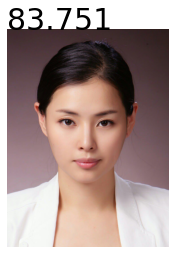

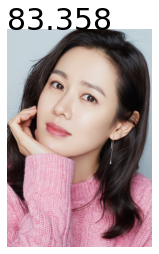

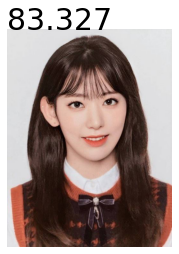

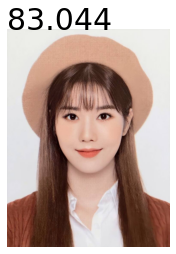

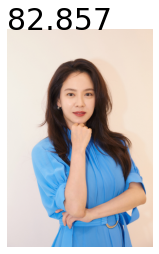

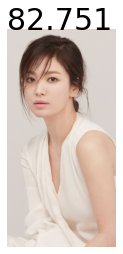

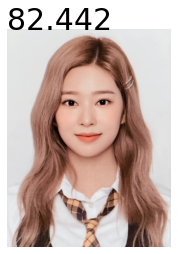

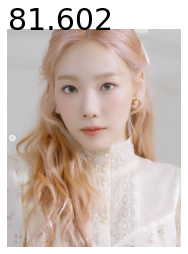

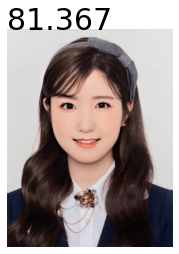

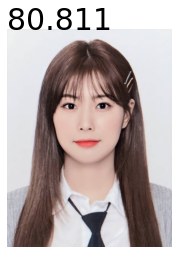

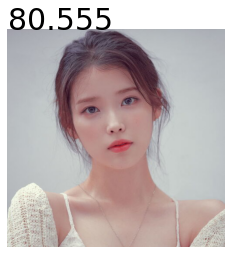

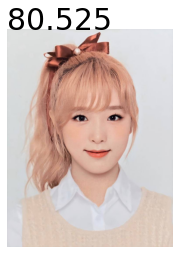

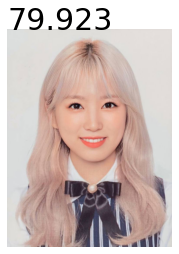

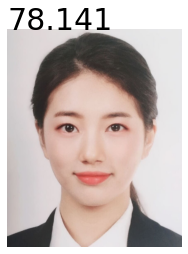

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib inline
 
result_1 = {}
for k,v in face_dict1.items():
    result_1[k] = v['faces'][0]['attributes']['beauty']['female_score']
 
for k,v in sorted(result_1.items(),reverse=True,key=lambda x:x[1]):
    im = Image.open("/content/drive/MyDrive/새 폴더 (2)/{0}.jpg".format(k))
    img_resize = im.resize((500, int(500*(im.height/im.width))))
    plt.imshow(np.asarray(img_resize))
    plt.text(0.4, 0.4, v, size=30)
    plt.axis("off")
    plt.show()